# Convolution Layers
Try to understand what each layer of the CNN is mapping.

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt



# Visualize the layers
from torchview import draw_graph


In [26]:
# Hyperparameters
num_epochs = 5
batch_size = 64
learning_rate = 0.001

# MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [27]:
print(train_dataset.data.shape)

torch.Size([60000, 28, 28])


In [28]:
# Define a simple CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)  # 7x7 image size after max pooling

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1) # flatten the output of conv layers
        out = self.fc(out)
        return out

model = CNN()
# model_graph = draw_graph(model, input_size=(60000, 28, 28), device='meta')
# model_graph.visual_graph


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [29]:
# Training loop
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [100/938], Loss: 0.4245
Epoch [1/5], Step [200/938], Loss: 0.3049
Epoch [1/5], Step [300/938], Loss: 0.1928
Epoch [1/5], Step [400/938], Loss: 0.0790
Epoch [1/5], Step [500/938], Loss: 0.0469
Epoch [1/5], Step [600/938], Loss: 0.0590
Epoch [1/5], Step [700/938], Loss: 0.1377
Epoch [1/5], Step [800/938], Loss: 0.0198
Epoch [1/5], Step [900/938], Loss: 0.0383
Epoch [2/5], Step [100/938], Loss: 0.0091
Epoch [2/5], Step [200/938], Loss: 0.0056
Epoch [2/5], Step [300/938], Loss: 0.1029
Epoch [2/5], Step [400/938], Loss: 0.0539
Epoch [2/5], Step [500/938], Loss: 0.0392
Epoch [2/5], Step [600/938], Loss: 0.0434
Epoch [2/5], Step [700/938], Loss: 0.0504
Epoch [2/5], Step [800/938], Loss: 0.0429
Epoch [2/5], Step [900/938], Loss: 0.0191
Epoch [3/5], Step [100/938], Loss: 0.0769
Epoch [3/5], Step [200/938], Loss: 0.0449
Epoch [3/5], Step [300/938], Loss: 0.1447
Epoch [3/5], Step [400/938], Loss: 0.0371
Epoch [3/5], Step [500/938], Loss: 0.0061
Epoch [3/5], Step [600/938], Loss:

3
torch.Size([1, 16, 14, 14])
16
14


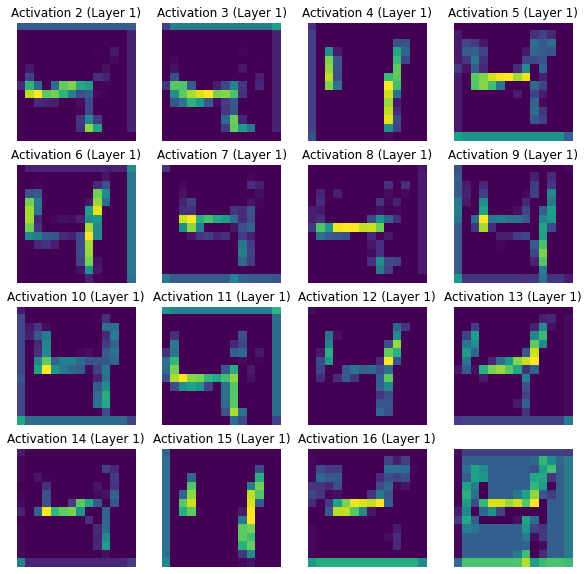

torch.Size([1, 32, 7, 7])
32
7


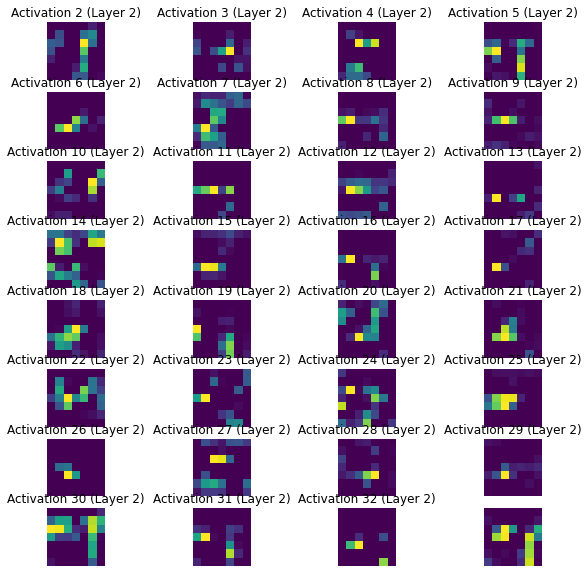

torch.Size([1, 10])
10


IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

<Figure size 720x720 with 0 Axes>

In [41]:
# Function to visualize activations
def visualize_activations(image):
    activations = []

    def hook_fn(module, input, output):
        activations.append(output)

    hooks = []
    for layer in model.children():
        hook = layer.register_forward_hook(hook_fn)
        hooks.append(hook)

    with torch.no_grad():
        model(image.unsqueeze(0))

    for hook in hooks:
        hook.remove()
        
    print(len(activations))

    for i, activation in enumerate(activations):
        plt.figure(figsize=(10, 10))
        print(activation.size())
        for j in range(activation.size(1)): # visualize all channels
            plt.title("Activation {} (Layer {})".format(j+1, i+1))
            plt.subplot(activation.size(1) // 4, 4, j + 1)
            plt.imshow(activation[0, j].cpu().numpy(), cmap='viridis')
            plt.axis('off')
        plt.show()
        # plt.savefig(f'images/03-{i}.png')
        

# Load a test image and visualize activations
test_image, _ = train_dataset[2]  # You can replace this with any test image
visualize_activations(test_image)

In [32]:
print(model)

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)
